# LOGISTIC REGRESSION

## 1. Data Exploration:

### a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
#import pandas library
import pandas as pd

In [2]:
#Read training csv file
df_train=pd.read_csv("Titanic_train.csv")
display("Training Data:\n",df_train.head())

#Read testing csv file
df_test=pd.read_csv("Titanic_test.csv")
display("Testing Data:\n",df_test.head())

'Training Data:\n'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Testing Data:\n'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Get info about titanic_train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#get the shape of the training dataset
display(df_train.shape)

#get the shape of the testing dataset
display(df_test.shape)

(891, 12)

(418, 11)

In [5]:
#Check for Duplicate rows
df_train.duplicated().sum()

np.int64(0)

### b. Examine the features, their types, and summary statistics.

In [6]:
#Check the datatypes
df_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
#Describe the statistical summary for numerical columns
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Describe thestatistical summary categorical columns
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
#Seperate categorical and numerical columns
cat_cols=df_train.select_dtypes(include='object')
num_cols=df_train.select_dtypes(include='number')
print("Categorical columns:",cat_cols.columns)
print("Numerical columns:",num_cols.columns)

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [10]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

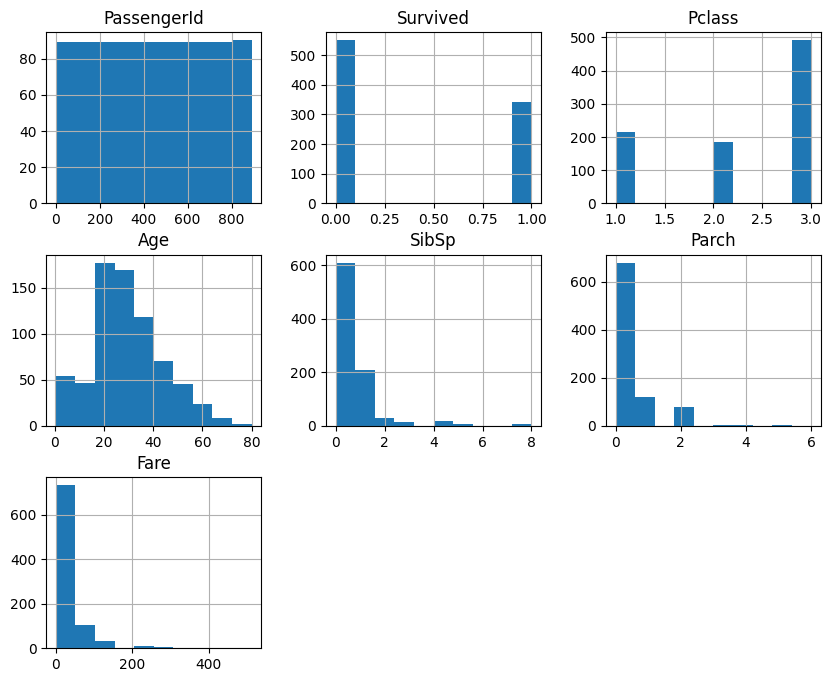

In [11]:
#Histogram
df_train.hist(figsize=(10,8))
plt.show()

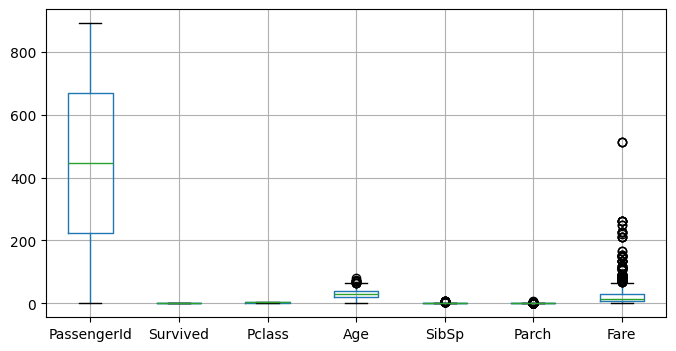

In [12]:
#Boxplot
df_train.boxplot(figsize=(8,4))
plt.show()

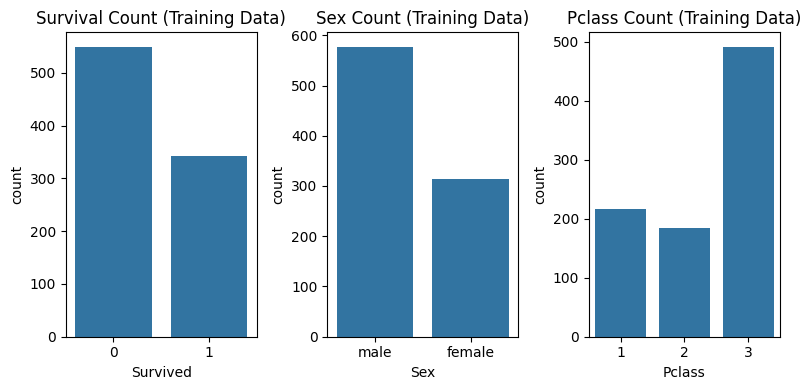

In [13]:
#Count plot for categorical column
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
sns.countplot(x='Survived', data=df_train, ax=axes[0])
axes[0].set_title('Survival Count (Training Data)')
sns.countplot(x='Sex', data=df_train, ax=axes[1])
axes[1].set_title('Sex Count (Training Data)')
sns.countplot(x='Pclass', data=df_train, ax=axes[2])
axes[2].set_title('Pclass Count (Training Data)')
plt.tight_layout()
plt.show()

In [14]:
#Find correlation between numeric features
corr = num_cols.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


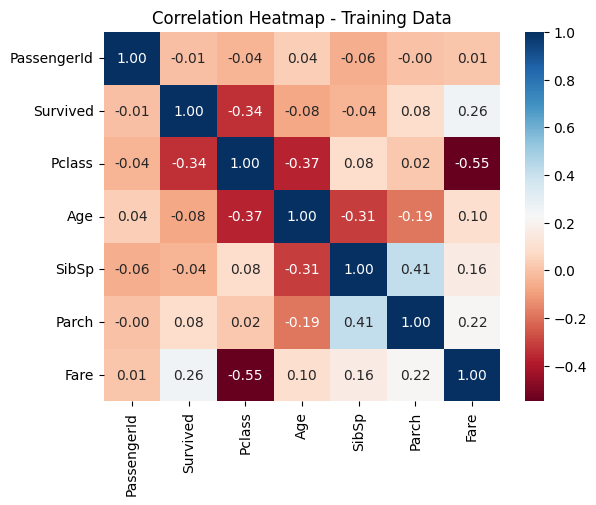

In [15]:
#Create heatmap
sns.heatmap(corr,annot=True,cmap='RdBu', fmt=".2f")
plt.title('Correlation Heatmap - Training Data')
plt.show()

### Analyze any patterns or correlations observed in the data

## 2. Data Preprocessing:

### a. Handle missing values (e.g., imputation).

In [16]:
#Check for missing values
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
#Fill miising values with it mean value for numeric column - age
df_train.fillna({'Age': df_train['Age'].mean()},inplace=True)
#Fill miising values with it mode value for categorical column - Embarked
df_train.fillna({'Embarked': df_train['Embarked'].mode()[0]},inplace=True)
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [18]:
#Drop cabin column
df_train.drop(['Cabin','Name','PassengerId','Ticket'], axis=1,inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [19]:
#Check for missing values after imputation
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


### b. Encode categorical variables.

In [20]:
#for cat in cat_cols:
# Convert 'Sex' column to numerical (0 or 1)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,29.699118,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


### 3. Model Building:

#### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [21]:
target=df_train['Survived']
features=df_train.drop(columns='Survived')

In [22]:
#import train_test_split and Logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
#Create LogisticRegression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence


#### b. Train the model using the training data.

In [24]:
#Split and train the logistic regression model
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

### 4. Model Evaluation:

#### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [25]:
#import accuracy, precision, recall, F1-score, and ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score,RocCurveDisplay

In [26]:
#Model evaluation
y_val_pred = model.predict(x_val)
y_pred_prob = model.predict_proba(x_val)[:, 1]

#Calculate performance metrics
Accuracy = accuracy_score(y_val, y_val_pred)
Precision = precision_score(y_val, y_val_pred)
Recall = recall_score(y_val, y_val_pred)
F1 = f1_score(y_val, y_val_pred)
ROC_AUC = roc_auc_score(y_val, y_pred_prob)

print("Evaluated Metrics Score:")
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-score: {F1:.4f}")
print(f"ROC-AUC Score: {ROC_AUC:.4f}")

Evaluated Metrics Score:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639
ROC-AUC Score: 0.8817


#### Visualize the ROC curve.

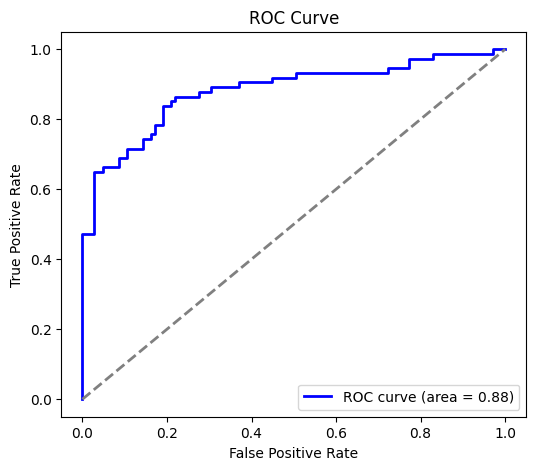

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639
ROC-AUC Score: 0.8817


In [27]:
# Visualize the ROC curve.
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the calculated metrics
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-score: {F1:.4f}")
print(f"ROC-AUC Score: {ROC_AUC:.4f}")

### 5. Interpretation:

#### a. Interpret the coefficients of the logistic regression model.

In [28]:
# Get the coefficients
coefficients = model.coef_[0]

# Get feature names
feature_names = x_train.columns

# Create a Series to associate coefficients with feature names
reg_coef = pd.Series(coefficients, index=feature_names)

# Print the coefficients and intercept
print("Model Coefficients:")
display(reg_coef)

Model Coefficients:


,0
Pclass,-0.942278
Sex,2.591391
Age,-0.031427
SibSp,-0.296929
Parch,-0.112189
Fare,0.002541
Embarked_Q,-0.091173
Embarked_S,-0.403754


#### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

### 6. Deployment with Streamlit:

In [29]:
import pickle


In [30]:
file = 'log_reg.pkl'

In [31]:
pickle.dump(model,open(file,'wb'))

In [32]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.2 MB/s eta 0:00:00


In [33]:
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 4s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('log_reg.pkl', 'rb') as file:
    model = pickle.load(file)

def user_input_parameters():
    Pclass= st.sidebar.selectbox('Select the Pclass',[1,2,3]) # Changed to 1,2,3 as per typical Pclass values
    Sex= st.sidebar.selectbox('Sex (Male: 0, Female: 1)',[0,1])
    Fare= st.sidebar.slider('Fare',0.0,500.0,30.0)
    Age= st.sidebar.slider('Age',0,100,25)
    # Modified: Use selectbox for Embarked and create one-hot encoded columns
    embarked_input = st.sidebar.selectbox('Embarked', ['S', 'C', 'Q'])

    embarked_Q_val = 1 if embarked_input == 'Q' else 0
    embarked_S_val = 1 if embarked_input == 'S' else 0

    data={
        'Pclass': Pclass,
        'Sex': Sex,
        'Age': Age,
        'SibSp': 0,
        'Parch': 0,
        'Fare': Fare,
        'Embarked_Q': embarked_Q_val,
        'Embarked_S': embarked_S_val
    }
    features= pd.DataFrame(data,index=[0])
    return features

st.title('Titanic Survival Prediction')
df= user_input_parameters()
pred_prob=model.predict_proba(df)
pred=model.predict(df)
button= st.button('Predict')
if button==True:
    st.subheader('Predicted')
    st.write('Eligible' if pred_prob[0][1]>=0.5 else 'Not Eligible')
    st.subheader('Pred_Probabilities')
    st.write(pred_prob)

Writing app.py


In [35]:
!wget -q -O - ipv4.icanhazip.com

34.23.76.241


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://rude-moles-wear.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.76.241:8501

